In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("BelloFashions.csv",index_col=[0])
df.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,₹ 675036.2138626401
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,"€ 2,315.53"
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,₹ 611426.29122378
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Mail,20,0
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,£ 6610.077565000001


### Filtering
Robin wants entries belonging to state average expense more than 7800. Let's see how to get this:

In [71]:
results = df.groupby('ProductType').filter(lambda a: a['Total_Ratings'].mean() > 7800)
results

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,"$4,287.06"
29,2020-08-02,10500,Jeans,1 star,9410,Unspecified,Direct Deposit,Mail,5,"$21,312,321.13"
38,2020-08-29,10509,Jeans,1 star,7352,Unspecified,Credit Card,Express,9,"$2,591.72"
45,2020-08-25,10516,Jeans,3 star,7033,Male,Direct Deposit,Normal,14,₹ 167727.12548098
47,2020-08-21,10518,Jeans,2 star,7285,Female,Credit Card,Normal,14,"€ 2,773.90"
48,2020-08-20,10519,Jeans,2 star,7678,Unspecified,Ewallet,Normal,18,₹ 159529.19686752
55,2020-08-05,10526,Jeans,2 star,9482,Unspecified,Direct Deposit,Normal,10,₹ 321706.90933682
61,2020-08-21,10532,Jeans,2 star,8399,Female,Credit Card,Economy,8,"€ 4,773.37"
65,2020-08-31,10536,Jeans,1 star,6878,Male,Prepaid Card,Express,10,"$7,072.56"
99,2020-08-29,10570,Jeans,1 star,7807,Unspecified,Credit Card,Mail,6,£ 6232.343745500001


In [72]:
df.drop(index=df[df['Price']=='0'].index, axis=0, inplace=True)

### Check missing price values

In [73]:
df['Currency'] = df['Price'].apply(lambda p: p[0])
df['Currency'].unique()

array(['₹', '€', '£', '$'], dtype=object)

In [74]:
df.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,₹ 675036.2138626401,₹
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,"€ 2,315.53",€
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,₹ 611426.29122378,₹
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,£ 6610.077565000001,£
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,"$4,287.06",$


In [75]:
df['Price'] = df['Price'].apply(lambda p: p[1:].replace(',',''))
df.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,675036.2138626401,₹
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2315.53,€
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,611426.29122378,₹
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,6610.077565000001,£
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.06,$


In [77]:
currency_conversion ={'₹':0.013727,'$':1, '€':1.224094, '£': 1.416665}
currency_conversion

{'₹': 0.013727, '$': 1, '€': 1.224094, '£': 1.416665}

In [76]:
df['Price'] = df['Price'].astype(float)
df.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,675036.213863,₹
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2315.530000,€
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,611426.291224,₹
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,6610.077565,£
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.060000,$


In [78]:
#df.apply(lambda p: p['Price']*currency_conversion[p['Currency']])
for index in df.index:
    df.loc[index, 'Price'] = (df.loc[index, 'Price'])*(currency_conversion[df.loc[index, 'Currency']])
df.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,9266.222108,₹
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2834.426380,€
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,8393.048700,₹
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,9364.265534,£
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.060000,$


In [79]:
df.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,9266.222108,₹
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2834.426380,€
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,8393.048700,₹
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,9364.265534,£
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.060000,$


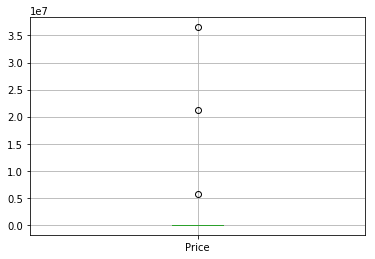

In [81]:
df.boxplot(column='Price')

In [80]:
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5*IQR
higher = q3 + 1.5*IQR
print(q1, q3, IQR, lower, higher)

2984.0761950861875 8054.7833388 5070.707143713813 -4621.9845204845315 15660.844054370718


In [82]:
cleaned_data = df[(df.Price >= lower) & (df.Price <= higher)]
cleaned_data.shape

(86, 11)

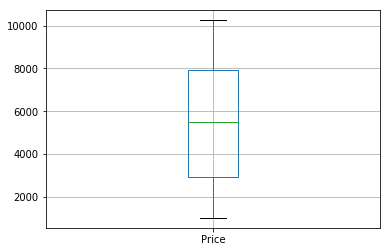

In [85]:
cleaned_data.boxplot(column='Price')

In [84]:
cleaned_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,9266.222108,₹
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2834.426380,€
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,8393.048700,₹
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,9364.265534,£
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.060000,$


In [83]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder(handle_unknown='ignore')

In [86]:
le.fit_transform(cleaned_data.ProductType.head())

array([0, 1, 0, 0, 2], dtype=int64)

In [89]:
cleaned_data['ProductType_lbl'] = le.fit_transform(cleaned_data.ProductType)
cleaned_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency,0,1,2,3,4,5,6,ProductType_lbl
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,9266.222108,₹,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2834.426380,€,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,8393.048700,₹,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,9364.265534,£,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.060000,$,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4


In [90]:
lbl_df = pd.DataFrame(ohe.fit_transform(cleaned_data[['ProductType_lbl']]).toarray())
lbl_df.index = cleaned_data.index

In [87]:
cleaned_data = cleaned_data.join(lbl_df)
cleaned_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency,0,1,2,3,4,5,6
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,9266.222108,₹,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2834.426380,€,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,8393.048700,₹,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,9364.265534,£,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.060000,$,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
pd.get_dummies(cleaned_data, columns=['ProductType']).head()

,Date,CustomerID,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency,...,5,6,ProductType_lbl,ProductType_Cardigan,ProductType_Coats/Jackets,ProductType_Dresses,ProductType_Hats,ProductType_Jeans,ProductType_Pants,ProductType_Shirts/Tops
0,2020-08-16,10471,1 star,8736,Female,Credit Card,Economy,17,9266.222108,₹,...,0.0,0.0,1,0,1,0,0,0,0,0
1,2020-08-02,10472,2 star,8547,Unspecified,Ewallet,Mail,12,2834.426380,€,...,0.0,0.0,2,0,0,1,0,0,0,0
2,2020-08-08,10473,2 star,9833,Unspecified,Prepaid Card,Mail,10,8393.048700,₹,...,0.0,0.0,1,0,1,0,0,0,0,0
6,2020-08-08,10477,5 star,9406,Unspecified,Direct Deposit,Mail,14,9364.265534,£,...,0.0,0.0,1,0,1,0,0,0,0,0
7,2020-08-08,10478,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.060000,$,...,0.0,0.0,4,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [94]:
lb.fit_transform(cleaned_data.ProductType)[:5]

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0]])

In [99]:
!pip install category-encoders --quiet  --disable-pip-version-check

In [101]:
from category_encoders import LeaveOneOutEncoder
lo = LeaveOneOutEncoder(cols=['ShippingMode'])

In [106]:
lo.fit(cleaned_data['Price'], cleaned_data['Price'])

KeyError: 'ShippingMode'

### Scaling

In [100]:
cleaned_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency,0,1,2,3,4,5,6,ProductType_lbl
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,9266.222108,₹,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2834.426380,€,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,8393.048700,₹,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,9364.265534,£,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.060000,$,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4


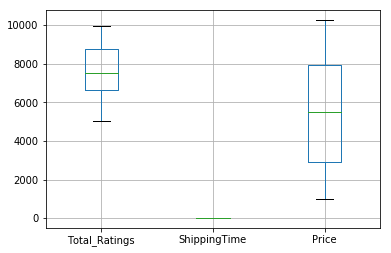

In [107]:
cleaned_data[['Total_Ratings','ShippingTime','Price']].boxplot()

In [118]:
from sklearn.preprocessing import StandardScaler
sc_total_ratings = StandardScaler()
sc_shipping_time = StandardScaler()
sc_price = StandardScaler()

In [112]:
scaled_data = cleaned_data.copy()

In [115]:
scaled_data['Total_Ratings'] = sc_total_ratings.fit_transform(cleaned_data[['Total_Ratings']])
scaled_data['ShippingTime'] = sc_shipping_time.fit_transform(cleaned_data[['ShippingTime']])
scaled_data['Price'] = sc_price.fit_transform(cleaned_data[['Price']])

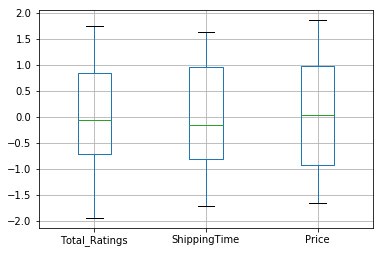

In [116]:
scaled_data[['Total_Ratings','ShippingTime','Price']].boxplot()

In [119]:
from sklearn.preprocessing import MinMaxScaler
sc_total_ratings = MinMaxScaler()
sc_shipping_time = MinMaxScaler()
sc_price = MinMaxScaler()

In [120]:
scaled_data_min_max = cleaned_data.copy()

In [121]:
scaled_data_min_max['Total_Ratings'] = sc_total_ratings.fit_transform(cleaned_data[['Total_Ratings']])
scaled_data_min_max['ShippingTime'] = sc_shipping_time.fit_transform(cleaned_data[['ShippingTime']])
scaled_data_min_max['Price'] = sc_price.fit_transform(cleaned_data[['Price']])

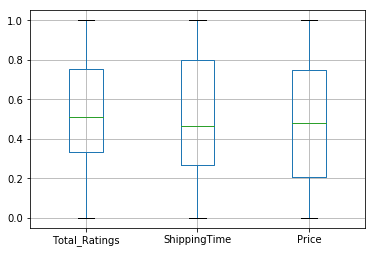

In [122]:
scaled_data_min_max[['Total_Ratings','ShippingTime','Price']].boxplot()

In [123]:
scaled_data_min_max[['Total_Ratings','ShippingTime','Price']].head()

,Total_Ratings,ShippingTime,Price
0,0.751265,0.800000,0.893291
1,0.713014,0.466667,0.197176
2,0.973285,0.333333,0.798787
6,0.886865,0.600000,0.903902
7,0.714430,0.866667,0.354395


In [124]:
from sklearn.preprocessing import Binarizer

In [126]:
binarized_data = cleaned_data.copy()

In [127]:
binarizer = Binarizer(5000)
binarized_data['Price_5000'] = binarizer.fit_transform(cleaned_data[['Price']])
binarized_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,Currency,0,1,2,3,4,5,6,ProductType_lbl,Price_5000
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17,9266.222108,₹,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12,2834.426380,€,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.0
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10,8393.048700,₹,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14,9364.265534,£,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0
7,2020-08-08,10478,Jeans,1 star,8554,Unspecified,Direct Deposit,Mail,18,4287.060000,$,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,0.0


In [129]:
binarized_data.to_csv('CleanedBelloFashions.csv',index=False)